In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
import scipy.ndimage
import skimage
import math
import cv2

In [138]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab6/lab6.bmp
!ls

lab6.bmp  sample_data


# Part1

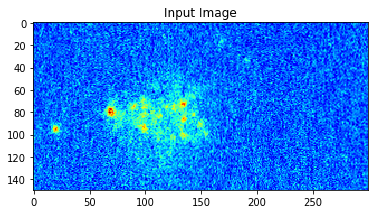

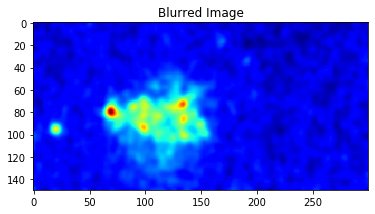

In [139]:
#  Create a Laplacian-of-Gaussian Volume
# steps 1-3
imfile = 'lab6.bmp'  
image = io.imread(imfile)
plt.title("Input Image")
plt.imshow(image,cmap='jet')
plt.show()
gaussianImg = filters.gaussian(image, 2.5)
plt.title("Blurred Image")
plt.imshow(gaussianImg,cmap='jet')
plt.show()





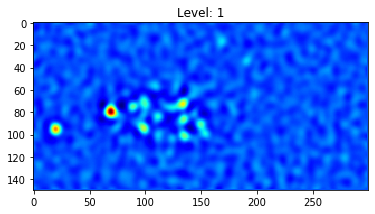

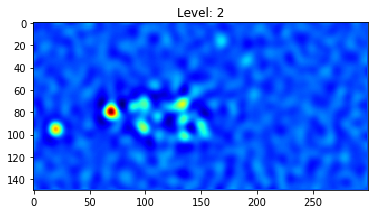

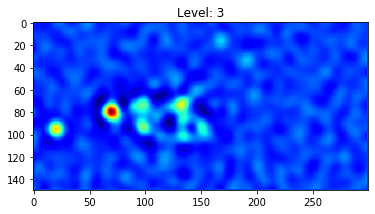

In [140]:
#steps 4 nd 5


s = 4
i=1
while (s<7):
  kernel = int(2*round(3*s)+1)
  gausImg = filters.gaussian(image, s)
  laplaceImg = filters.laplace(gausImg,  ksize = kernel)
  plt.title("Level: " + str(i))
  plt.imshow(laplaceImg,cmap='jet')
  plt.show()
  s+=1
  i+=1

# Part2

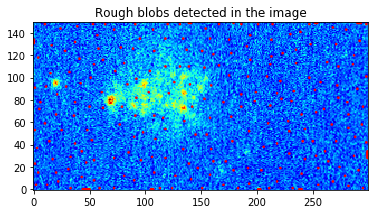

In [141]:
imfile = 'lab6.bmp'  
image = io.imread(imfile)

height, width = image.shape

s = 4
start = 4

channel = np.zeros((height, width, 3), np.float64)

while (s<7):
  k = int(2*round(3*s)+1)
  gausImg = filters.gaussian(image, s)
  laplaceImg = filters.laplace(gausImg, ksize = k)
  channel[:,:,s-start] = laplaceImg
  s+=1    
 
minImg = scipy.ndimage.filters.minimum_filter(channel, 9)

newImg = (channel == minImg)

sumImg = np.sum(newImg, axis=2)
x,y = np.nonzero(sumImg)

plt.scatter(y, x, edgecolors = 'none', c='r', s=s)
plt.imshow(image, cmap='jet')
plt.title("Rough blobs detected in the image")
plt.gca().invert_yaxis()
plt.show()





# Part3

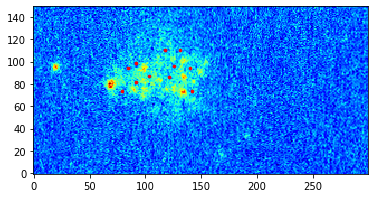

In [142]:
sigmaVal=2.5
#k = int(sigma*round(3*sigma)+1)
gaussianImage = filters.gaussian(image, sigmaVal)

resizeImage = img_as_ubyte(gaussianImage)

otsuThreshImage = filters.threshold_otsu(resizeImage, nbins=256)


#newThreshold =  sumImg > otsuThreshImage
newThreshold = np.multiply(sumImg, resizeImage>=otsuThreshImage)


x,y = np.nonzero(newThreshold)
plt.imshow(image, cmap ='jet')
plt.scatter(y, x, c='r',s=s)
plt.gca().invert_yaxis()
plt.show()
